In [49]:
import pandas as pd 

In [50]:
import numpy as np

In [51]:
!ls ../out

1_moreout.out  3_moreout.out  output_aCM.csv   output_SLATM.csv
2_moreout.out  4_moreout.out  output_FCHL.csv  output_SOAP.csv


In [52]:
slatm_out = pd.read_csv("../out/output_SLATM.csv", index_col=0)

In [53]:
slatm_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments
0,1,"['qm7_1107', 'qm7_5455']","[[6, 6], [6, 6]]",114778.0,154778.0,"[[(6, 4), (2, 5), (1, 6), (5, 9)], [(7, 1), (6..."
1,2,"['qm7_5455', 'qm7_1107']","[[6, 6], [6, 6]]",114778.0,154778.0,"[[(7, 1), (6, 2), (4, 3), (2, 7), (3, 8)], [(6..."
2,3,"['qm7_5455', 'qm7_1107']","[[6, 6], [6, 6]]",114778.0,154778.0,"[[(7, 1), (6, 2), (4, 3), (2, 7), (3, 8)], [(6..."
3,4,"['qm7_51', 'qm7_1112', 'qm7_111']","[[6], [6, 6], [6, 6, 7]]",94791.0,154791.0,"[[(2, 7), (3, 8), (4, 9)], [(1, 1), (2, 2), (6..."
4,5,"['qm7_51', 'qm7_1112', 'qm7_111']","[[6], [6, 6], [6, 6, 7]]",94791.0,154791.0,"[[(2, 7), (3, 8), (4, 9)], [(1, 1), (2, 2), (6..."
...,...,...,...,...,...,...
995,996,"['qm7_5544', 'qm7_47', 'qm7_111']","[[7, 6, 6], [6], [6, 6, 7]]",106335.0,176335.0,"[[(4, 2), (6, 3), (7, 4), (5, 6)], [(4, 7), (3..."
996,997,"['qm7_6084', 'qm7_6388']","[[8, 6, 6], [6, 6]]",126336.0,176336.0,"[[(6, 3), (7, 4), (2, 5), (1, 6)], [(5, 1), (4..."
997,998,"['qm7_6084', 'qm7_6388']","[[8, 6, 6], [6, 6]]",126336.0,176336.0,"[[(6, 3), (7, 4), (2, 5), (1, 6)], [(5, 1), (4..."
998,999,"['qm7_1112', 'qm7_5455']","[[6, 6], [6, 6]]",136353.0,176353.0,"[[(1, 1), (2, 2), (6, 3), (5, 4)], [(6, 5), (7..."


In [54]:
from ast import literal_eval 

In [55]:
slatm_out["Fragments"] = slatm_out["Fragments"].apply(literal_eval)

In [56]:
slatm_out["Sorted Fragments"] = slatm_out["Fragments"].apply(lambda x:sorted(x))

In [57]:
len(np.unique(slatm_out["Sorted Fragments"]))

223

In [58]:
# excess is missing Hs - to fix 

In [59]:
import qml

In [60]:
qm9_mol = qml.Compound("../targets/qm9_0.xyz")
qm9_ncharges = qm9_mol.nuclear_charges

In [61]:
qm9_ncharges

array([8, 6, 6, 7, 6, 8, 8, 7, 6, 1, 1])

In [62]:
def count_ncharges(list_ncharges, elements=[1,6,7,8,16]):
    ncharge_count = np.zeros(len(elements))
    for ncharge in list_ncharges:
        for i, elem in enumerate(elements):
            if ncharge == elem:
                ncharge_count[i] += 1
    return ncharge_count

In [63]:
qm9_counts = count_ncharges(qm9_ncharges)

In [64]:
qm9_counts

array([2., 4., 2., 3., 0.])

In [65]:
def get_excess_frags(frag_list):
    mols = [qml.Compound("../qm7/xyz/"+x+".xyz") for x in frag_list]
    ncharges = np.concatenate([mol.nuclear_charges for mol in mols])
    ncharge_count = count_ncharges(ncharges)
    
    diff_count = ncharge_count - qm9_counts
    excess = [[ncharge]*int(count) for ncharge, count in zip([1,6,7,8,16], diff_count)]
    return np.concatenate(excess)

In [66]:
get_excess_frags(['qm7_1107', 'qm7_5455'])

array([1., 1., 1., 1., 1., 1., 1., 1., 6., 6., 6., 6.])

In [67]:
slatm_out["Excess"] = slatm_out["Fragments"].apply(get_excess_frags)

In [68]:
slatm_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments,Sorted Fragments
0,1,"[qm7_1107, qm7_5455]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",114778.0,154778.0,"[[(6, 4), (2, 5), (1, 6), (5, 9)], [(7, 1), (6...","[qm7_1107, qm7_5455]"
1,2,"[qm7_5455, qm7_1107]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",114778.0,154778.0,"[[(7, 1), (6, 2), (4, 3), (2, 7), (3, 8)], [(6...","[qm7_1107, qm7_5455]"
2,3,"[qm7_5455, qm7_1107]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",114778.0,154778.0,"[[(7, 1), (6, 2), (4, 3), (2, 7), (3, 8)], [(6...","[qm7_1107, qm7_5455]"
3,4,"[qm7_51, qm7_1112, qm7_111]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",94791.0,154791.0,"[[(2, 7), (3, 8), (4, 9)], [(1, 1), (2, 2), (6...","[qm7_111, qm7_1112, qm7_51]"
4,5,"[qm7_51, qm7_1112, qm7_111]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",94791.0,154791.0,"[[(2, 7), (3, 8), (4, 9)], [(1, 1), (2, 2), (6...","[qm7_111, qm7_1112, qm7_51]"
...,...,...,...,...,...,...,...
995,996,"[qm7_5544, qm7_47, qm7_111]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",106335.0,176335.0,"[[(4, 2), (6, 3), (7, 4), (5, 6)], [(4, 7), (3...","[qm7_111, qm7_47, qm7_5544]"
996,997,"[qm7_6084, qm7_6388]","[1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 6.0, 6.0, 8.0]",126336.0,176336.0,"[[(6, 3), (7, 4), (2, 5), (1, 6)], [(5, 1), (4...","[qm7_6084, qm7_6388]"
997,998,"[qm7_6084, qm7_6388]","[1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 6.0, 6.0, 8.0]",126336.0,176336.0,"[[(6, 3), (7, 4), (2, 5), (1, 6)], [(5, 1), (4...","[qm7_6084, qm7_6388]"
998,999,"[qm7_1112, qm7_5455]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",136353.0,176353.0,"[[(1, 1), (2, 2), (6, 3), (5, 4)], [(6, 5), (7...","[qm7_1112, qm7_5455]"


In [69]:
# get energies
# qm7 energies are in qm7 dir 
# need qm9 energies and excess contribution

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
# need ncharges list and list of energies

In [72]:
import qml

In [73]:
qm7 = pd.read_csv("../qm7/energies.csv", index_col=0)
files = qm7["file"].to_list()

In [74]:
mols = [qml.Compound("../qm7/xyz/"+x+".xyz") for x in files]

In [75]:
ncharges = [mol.nuclear_charges for mol in mols]

In [76]:
# ncharges convert to count
elements = [1, 6, 7, 8, 16]
ncharge_counts = []
for ncharge_list in ncharges: 
    ncharge_count = count_ncharges(ncharge_list)
    ncharge_counts.append(ncharge_count)

In [77]:
energies = qm7["energy / Ha"].to_list()

In [78]:
reg = LinearRegression().fit(ncharge_counts, energies)

In [79]:
reg.score(ncharge_counts, energies)

0.9999998316921461

In [80]:
coeff_energies = reg.coef_

In [81]:
coeff_energies

array([  -0.61002842,  -38.01906467,  -54.64773278,  -75.09076869,
       -397.94238855])

In [82]:
coeff_energies = dict(zip(elements, coeff_energies))

In [93]:
def match_file_to_energy(filename):
    energies = pd.read_csv("../qm7/energies.csv")
    energy = energies.loc[energies["file"] == filename]["energy / Ha"]
    return float(energy)

In [84]:
def get_excess_energy(excess_ncharges):
    energy = np.sum([coeff_energies[x] for x in excess_ncharges])
    return energy

In [85]:
def get_reaction_energy(fragment_list, excess_ncharges):
    qm9_energy = -487.817450280942 # Ha
    
    excess_energy = get_excess_energy(excess_ncharges)
    
    frag_energies = np.sum([match_file_to_energy(x) for x in fragment_list])
    
    rxn_energy = frag_energies - qm9_energy - excess_energy
    return rxn_energy

In [94]:
slatm_out["energies / Ha"] = slatm_out.apply(lambda x: get_reaction_energy(x["Fragments"], x["Excess"]), axis=1)

In [95]:
slatm_out["energies / kcal/mol"] = slatm_out["energies / Ha"] * 627.5

In [96]:
slatm_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments,Sorted Fragments,energies / Ha,energies / kcal/mol
0,1,"[qm7_1107, qm7_5455]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",114778.0,154778.0,"[[(6, 4), (2, 5), (1, 6), (5, 9)], [(7, 1), (6...","[qm7_1107, qm7_5455]",0.058397,36.643873
1,2,"[qm7_5455, qm7_1107]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",114778.0,154778.0,"[[(7, 1), (6, 2), (4, 3), (2, 7), (3, 8)], [(6...","[qm7_1107, qm7_5455]",0.058397,36.643873
2,3,"[qm7_5455, qm7_1107]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",114778.0,154778.0,"[[(7, 1), (6, 2), (4, 3), (2, 7), (3, 8)], [(6...","[qm7_1107, qm7_5455]",0.058397,36.643873
3,4,"[qm7_51, qm7_1112, qm7_111]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",94791.0,154791.0,"[[(2, 7), (3, 8), (4, 9)], [(1, 1), (2, 2), (6...","[qm7_111, qm7_1112, qm7_51]",0.106522,66.842726
4,5,"[qm7_51, qm7_1112, qm7_111]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",94791.0,154791.0,"[[(2, 7), (3, 8), (4, 9)], [(1, 1), (2, 2), (6...","[qm7_111, qm7_1112, qm7_51]",0.106522,66.842726
...,...,...,...,...,...,...,...,...,...
995,996,"[qm7_5544, qm7_47, qm7_111]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",106335.0,176335.0,"[[(4, 2), (6, 3), (7, 4), (5, 6)], [(4, 7), (3...","[qm7_111, qm7_47, qm7_5544]",0.056834,35.663622
996,997,"[qm7_6084, qm7_6388]","[1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 6.0, 6.0, 8.0]",126336.0,176336.0,"[[(6, 3), (7, 4), (2, 5), (1, 6)], [(5, 1), (4...","[qm7_6084, qm7_6388]",0.074618,46.822679
997,998,"[qm7_6084, qm7_6388]","[1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 6.0, 6.0, 8.0]",126336.0,176336.0,"[[(6, 3), (7, 4), (2, 5), (1, 6)], [(5, 1), (4...","[qm7_6084, qm7_6388]",0.074618,46.822679
998,999,"[qm7_1112, qm7_5455]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",136353.0,176353.0,"[[(1, 1), (2, 2), (6, 3), (5, 4)], [(6, 5), (7...","[qm7_1112, qm7_5455]",0.072101,45.243206


In [120]:
import matplotlib.pyplot as plt
import matplotlib

In [129]:
matplotlib.rcParams.update({'font.size': 12})

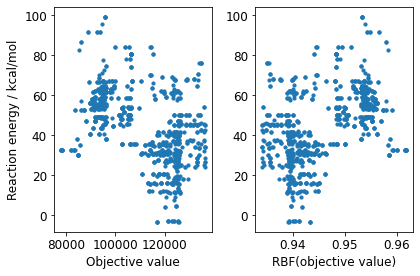

In [130]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(slatm_out["ObjValNoPen"], slatm_out["energies / kcal/mol"], s=10)
ax[0].set_xlabel("Objective value")
ax[0].set_ylabel("Reaction energy / kcal/mol")

x = np.exp(-slatm_out["ObjValNoPen"]/(2*1000**2))
ax[1].scatter(x, slatm_out["energies / kcal/mol"], s=10)
ax[1].set_xlabel("RBF(objective value)")

plt.tight_layout()
#plt.savefig("../figures/correlation-slatm.png", dpi=300)
plt.show()